<a href="https://colab.research.google.com/github/elgrhy/machinelearning/blob/main/predictWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This morning, I checked the weather and was impressed by the user-friendly interface and background of the Google Weather app. This inspired me to write a Python script to predict the weather using the Facebook Prophet library for time series forecasting. With this script, I am able to forecast the weather and stay prepared for any changes in the forecast. Overall, I am quite pleased with the results and look forward to continuing to use and improve this script.

note: The data in was was imported from Nicholas Renotte's public repository, I was going to use ARIMA, but i said lets try prophet.


In [29]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


# install and import dependecies

In [30]:
import warnings;
warnings.simplefilter('ignore')

In [31]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import prophet

In [32]:
df = pd.read_csv('dataset (1).csv')

In [33]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [34]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


**We will drop product and store.**

In [35]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


**Lets check the types of the values and time date, and change the time date to time date formate**

In [36]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [37]:
df['Year'] = df['Time Date'].apply(lambda x: str(x) [-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x) [-6: -4])
df['Day'] = df['Time Date'].apply(lambda x: str(x) [: -6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [38]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [39]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [40]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [41]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [42]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Model

In [44]:
from prophet.forecaster import Prophet
pfmodel = Prophet(interval_width=0.95, daily_seasonality=True)
model = pfmodel.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplodsyxsf/_jeqnnjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplodsyxsf/l4r_rya3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60245', 'data', 'file=/tmp/tmplodsyxsf/_jeqnnjz.json', 'init=/tmp/tmplodsyxsf/l4r_rya3.json', 'output', 'file=/tmp/tmplodsyxsf/prophet_modelxitzggup/prophet_model-20230112170007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecast The Wealther

**We will predict 100 days in the future.**

In [45]:
future = pfmodel.make_future_dataframe(periods=100, freq='D')
forecast = pfmodel.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.070476,731.559554,3944.889151,3041.070476,3041.070476,-642.519352,-642.519352,-642.519352,466.57542,...,16.623819,16.623819,16.623819,-1125.718591,-1125.718591,-1125.718591,0.0,0.0,0.0,2398.551124
1,2018-01-02,3041.848842,799.110302,3981.708752,3041.848842,3041.848842,-652.648904,-652.648904,-652.648904,466.57542,...,-11.281075,-11.281075,-11.281075,-1107.943248,-1107.943248,-1107.943248,0.0,0.0,0.0,2389.199937
2,2018-01-03,3042.627207,709.807374,4047.413558,3042.627207,3042.627207,-626.822675,-626.822675,-626.822675,466.57542,...,-4.411502,-4.411502,-4.411502,-1088.986593,-1088.986593,-1088.986593,0.0,0.0,0.0,2415.804532
3,2018-01-04,3043.405573,1014.900171,4043.918604,3043.405573,3043.405573,-579.864732,-579.864732,-579.864732,466.57542,...,22.484584,22.484584,22.484584,-1068.924735,-1068.924735,-1068.924735,0.0,0.0,0.0,2463.540841
4,2018-01-05,3044.183939,863.265080,4078.682194,3044.183939,3044.183939,-615.887354,-615.887354,-615.887354,466.57542,...,-34.576305,-34.576305,-34.576305,-1047.886469,-1047.886469,-1047.886469,0.0,0.0,0.0,2428.296585


In [46]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4238.518178,2252.478540,5354.481998,4235.235823,4241.543460,-515.871161,-515.871161,-515.871161,466.57542,...,16.623819,16.623819,16.623819,-999.070400,-999.070400,-999.070400,0.0,0.0,0.0,3722.647017
1176,2021-03-23,4239.589543,2084.565774,5221.800518,4236.260180,4242.673087,-533.339122,-533.339122,-533.339122,466.57542,...,-11.281075,-11.281075,-11.281075,-988.633467,-988.633467,-988.633467,0.0,0.0,0.0,3706.250421
1177,2021-03-24,4240.660909,2164.640783,5339.656884,4237.292057,4243.804402,-518.810470,-518.810470,-518.810470,466.57542,...,-4.411502,-4.411502,-4.411502,-980.974387,-980.974387,-980.974387,0.0,0.0,0.0,3721.850439
1178,2021-03-25,4241.732274,2224.104324,5355.495667,4238.318984,4244.935398,-487.616197,-487.616197,-487.616197,466.57542,...,22.484584,22.484584,22.484584,-976.676200,-976.676200,-976.676200,0.0,0.0,0.0,3754.116077
1179,2021-03-26,4242.803639,2059.300715,5302.080592,4239.348146,4246.066395,-544.237881,-544.237881,-544.237881,466.57542,...,-34.576305,-34.576305,-34.576305,-976.236996,-976.236996,-976.236996,0.0,0.0,0.0,3698.565759


** filter data **

In [48]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
1175,2021-03-22,3722.647017
1176,2021-03-23,3706.250421
1177,2021-03-24,3721.850439
1178,2021-03-25,3754.116077
1179,2021-03-26,3698.565759


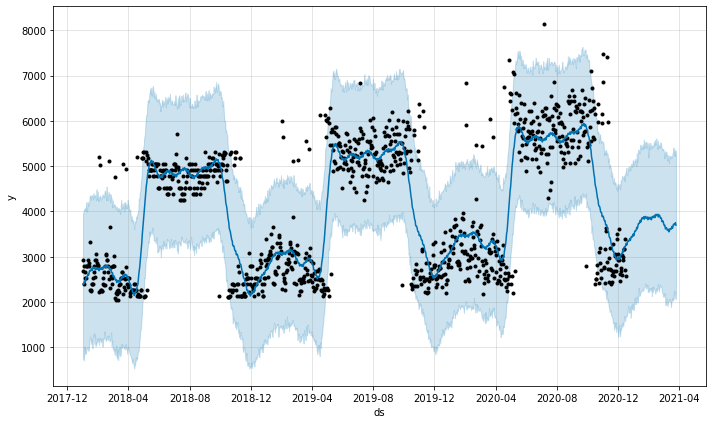

In [50]:
plot1 = pfmodel.plot(forecast)

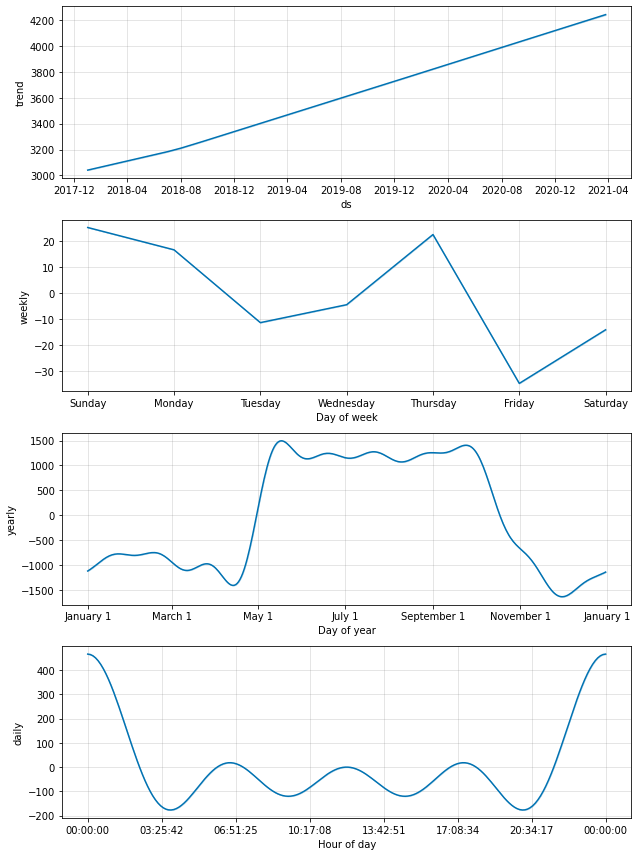

In [51]:
plot2 = pfmodel.plot_components(forecast)